# Анализ данных
инструмент анализа данных

In [ ]:
%load_ext autoreload 
%autoreload 2
import sys
sys.path.append('../SDS-modelling-demo/scripts')
import scripts.data_preprocessing as preproc
import scripts.documentation as doc
import scripts.database_management as db_management

from sklearn.ensemble import RandomForestRegressor
from sklearn.feature_selection import f_regression, mutual_info_regression
from sklearn.decomposition import PCA
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np
import pandas as pd
import sqlite3 as sql
from sklearn.preprocessing import MinMaxScaler, StandardScaler, LabelEncoder, OneHotEncoder
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from scipy.integrate import simps
import glob

import warnings
warnings.filterwarnings('ignore')  # офнули уведы об ошибках


WARNING (pytensor.tensor.blas): Using NumPy C-API based implementation for BLAS functions.


* Инициализация инстанса базы данных

In [ ]:
db = db_management.database(**{
    "dbname": doc.db_database_name, 
    "user": doc.db_user_name, 
    "password": doc.db_password
})

* Запись в бд

In [ ]:
# 'Correct sizes', 'Staged sizes'
folder_path = 'pathname'  # Path of raw data

txt_files = glob.glob(f"{folder_path}/*.txt")
md_files = glob.glob(f"{folder_path}/*.md")

all_files = txt_files + md_files

for file_path in all_files:  # ~ 8-12'
    #document = preproc.file_data_proccesor(file_path=file_path, database=db)
    #document.write()
    pass


* Создание датафрейма из инстанса

In [6]:
data = np.array(db.GET(["id"]+doc.features+[doc.target], {}, table_name="sizes"))
data_df = pd.DataFrame(data[:,1:], index=data[:,0], columns=doc.features+[doc.target])

* Создание дата инстанса

In [8]:
data_inst = preproc.data_instance(data_df, db)  # создание дата инстанса

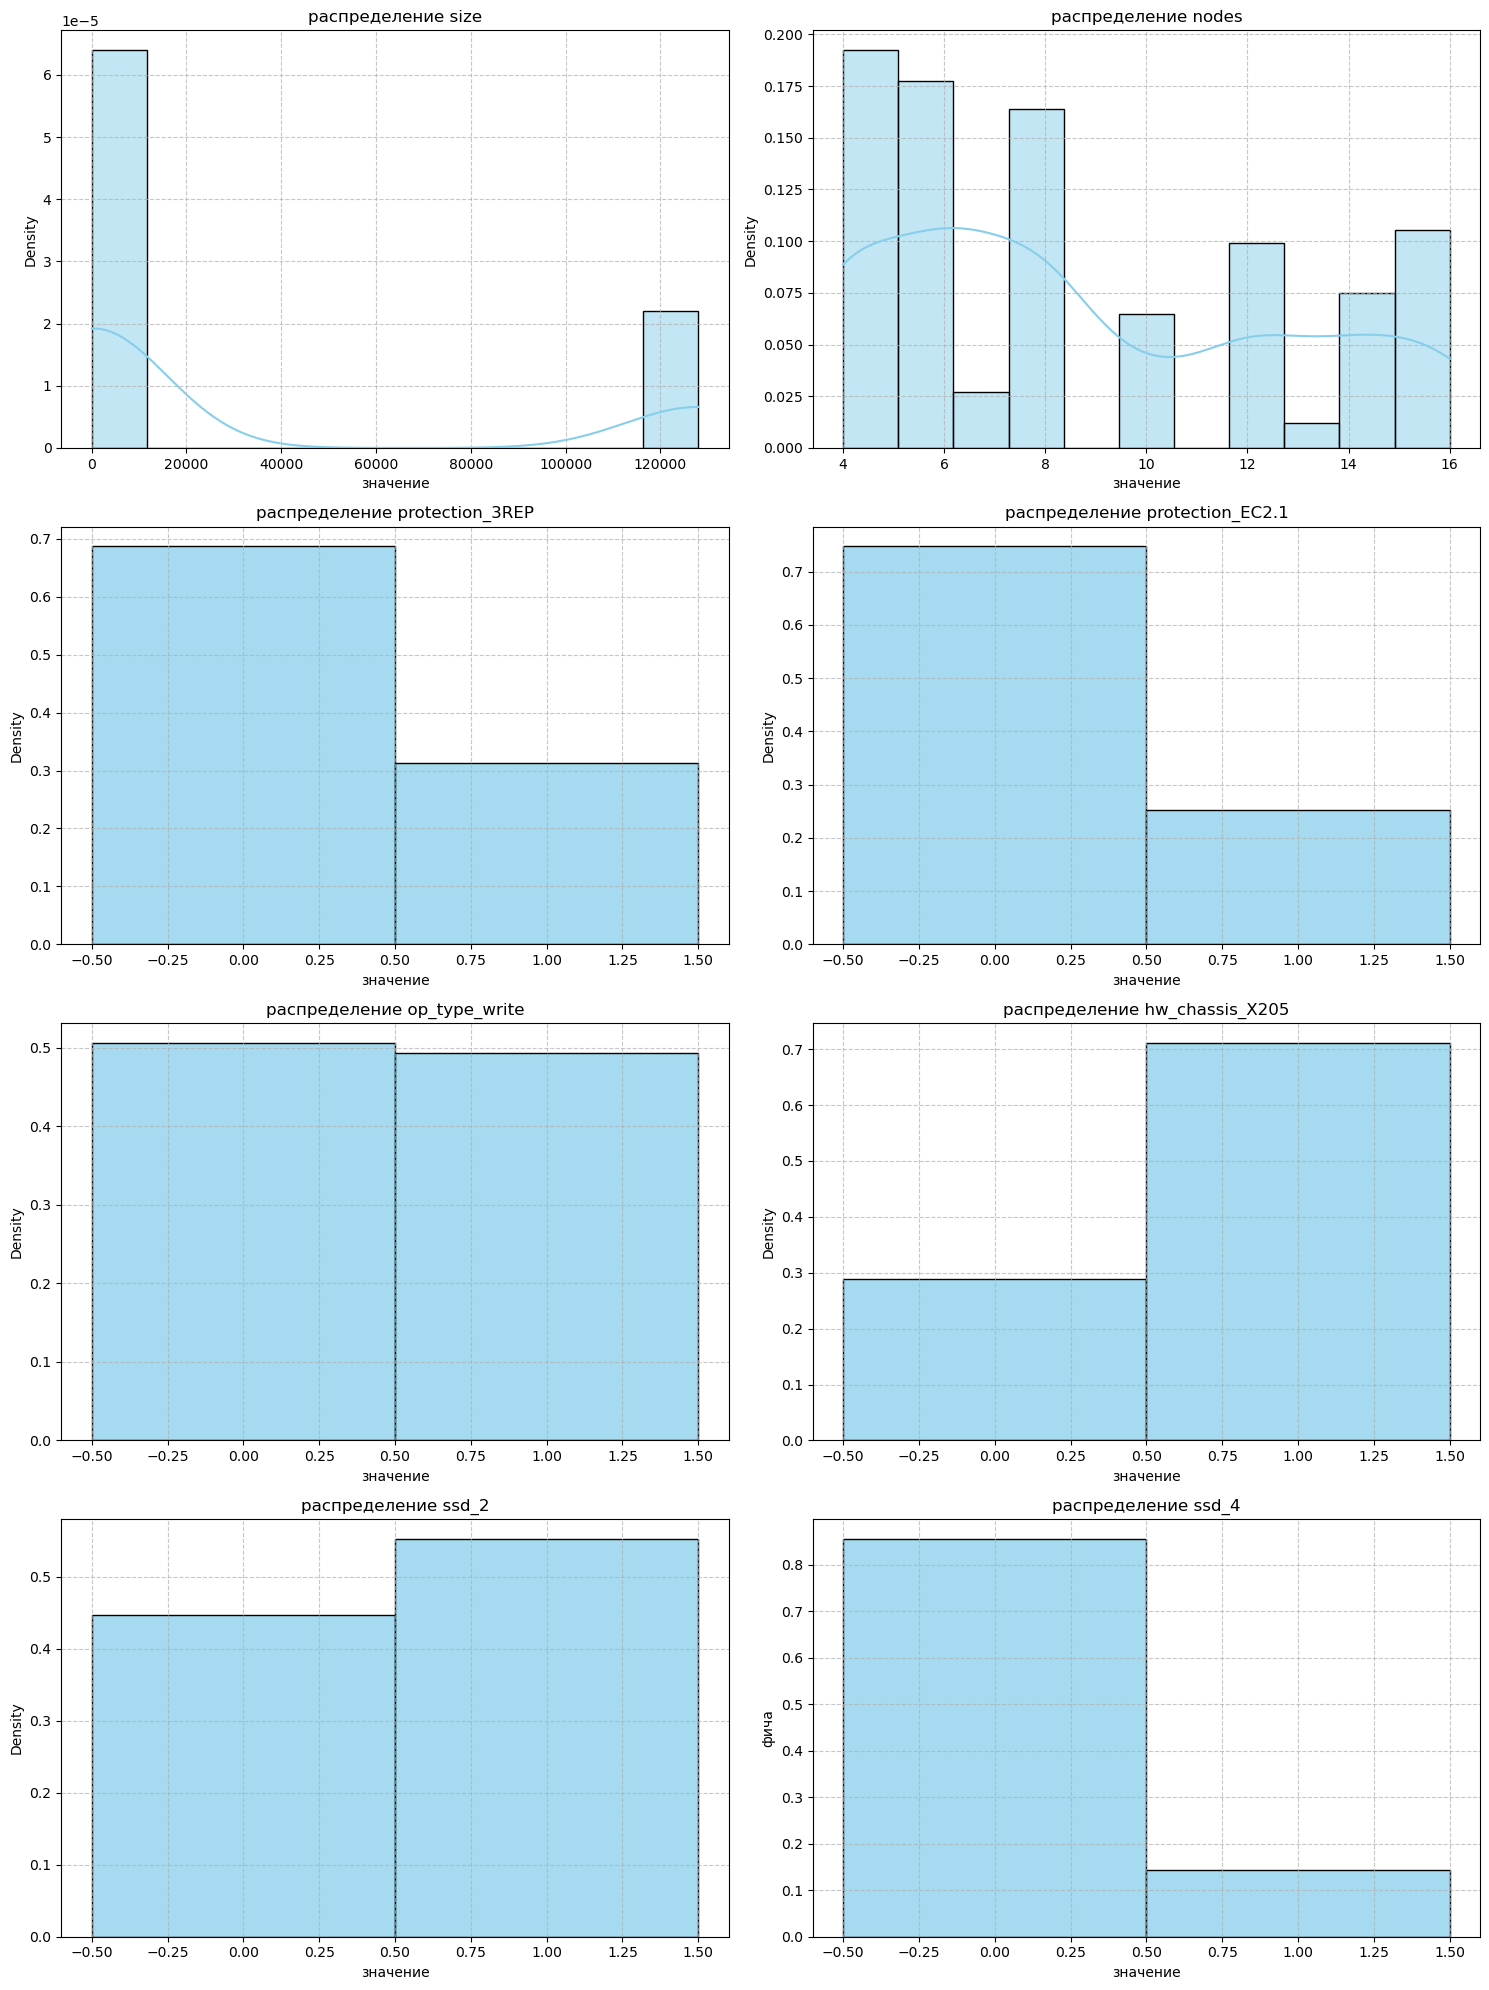

In [9]:
data_inst.distribution()

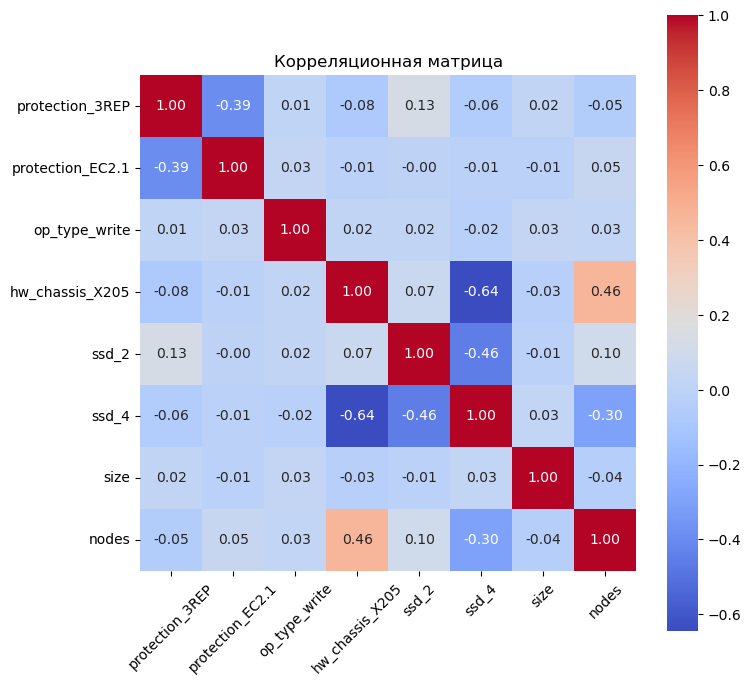

In [10]:
data_inst.correlation_matrix()

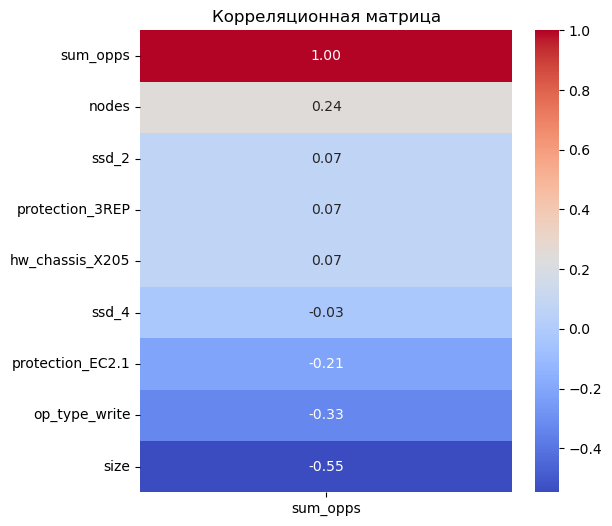

In [12]:
data_inst.correlation_matrix_to_target()

In [ ]:
parametr = 'nodes'
'''
It's an Ox' value
(Oy always is a target value --- perfomance)
'''

### fix other params for detail searching
fix_params_1 = {
    'protection': '*',
    'nodes': '*',
    'op_type': '*',
    'hw_chassis': '*',
    'ssd': '*'
}
### we can define here other pack of params for compare
fix_params_2 = {
    'protection': '*',
    'nodes': '*',
    'op_type': '*',
    'hw_chassis': '*',
    'ssd': '*'
}
###
data_inst.compare_graphs(parametr, fix_params_1, fix_params_2)

![analysis_1.png](demo_graphs/analysis_1.png)

In [ ]:
parametr = 'size'
'''
It's an Ox' value
(Oy always is a target value --- perfomance)
'''

### fix other params for detail searching
fix_params_1 = {
    'protection': '*',
    'nodes': '*',
    'op_type': '*',
    'hw_chassis': '*',
    'ssd': '*'
}
### we can define here other pack of params for compare
fix_params_2 = {
    'protection': '*',
    'nodes': '*',
    'op_type': '*',
    'hw_chassis': '*',
    'ssd': '*'
}
###
data_inst.compare_graphs(parametr, fix_params_1, fix_params_2)

![analysis.png](demo_graphs/analysis.png)